In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
import scipy.stats

In [3]:
base_file_dir = "L:/Safety Forecasting Tool/"

In [4]:
with open(base_file_dir+'data/processed/df_rural_train.pkl', 'rb') as f:
    df_rural_train = pickle.load(f)
with open(base_file_dir+'data/processed/df_rural_train_label.pkl', 'rb') as f:
    df_rural_train_label = pickle.load(f)
with open(base_file_dir+'data/processed/df_urban_train.pkl', 'rb') as f:
    df_urban_train = pickle.load(f)
with open(base_file_dir+'data/processed/df_urban_train_label.pkl', 'rb') as f:
    df_urban_train_label = pickle.load(f)

# Workflow 

<font color="purple"> **5 Steps of performing correlation test** </font>

- Step 1: Examine the raw data
    - From tables
    - From figures
- Step 2: Select correct statistical test methods
- Step 3: Adapt data for statistical test
- Step 4: Perform statistical test
- Step 5: Interpret the test results 
    - From mathematical aspect
    - Relate with the study purpose

# Examples

## Example 1: Nominal X * Nominal Y: 

Test if there is an association between road sign (Yes/No) and crash occurrence (Crash/No Crash)

In [5]:
# Step 1: Examine the raw data
pd.crosstab(df_urban_train['road_sign_type'],df_urban_train_label)

df_train_label,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,12.0
road_sign_type,,,,,,,,,,,
Flasher,1847,9,0,0,0,0,0,0,0,0,0
None,560769,6334,458,99,19,12,4,1,2,1,1
Other,8309,80,3,0,0,0,0,0,0,0,0
R2-1,75270,709,38,6,0,0,0,0,1,0,0
S1-1,48345,229,2,0,0,0,0,0,0,0,0
S4-5,5357,10,1,0,0,0,0,0,0,0,0
S4-5a,1403,5,0,0,0,0,0,0,0,0,0
S5-1,20061,75,0,0,0,0,0,0,0,0,0
S5-2,12233,47,0,0,0,0,0,0,0,0,0


Step 2: Select correct statistical test methods

According to [Transportation-Study-Focused-CorrelationTest](./Transportation-Study-Focused-CorrelationTest.ipynb) chapter, there are two coefficients that are suitable for understanding the variable correlation: Odds-ratio and Phi-coefficient.

In [6]:
# Step 3: Adapt data for statistical test
## Change road_sign_type to be road sign (Yes/No)
## Change df_urban_train_label to be crash occurrence (Crash/No Crash)
df_test = pd.DataFrame()
df_test['RoadSignOrNot'] = df_urban_train['road_sign_type'].values
df_test['RoadSignOrNot'] = df_test['RoadSignOrNot'].mask(df_urban_train['road_sign_type'].values!='None',1)
df_test['RoadSignOrNot'] = df_test['RoadSignOrNot'].mask(df_urban_train['road_sign_type'].values=='None',0)
df_test['CrashOrNot'] = df_urban_train_label.values
df_test['CrashOrNot'] = df_test['CrashOrNot'].mask(df_test['CrashOrNot']>0,1)

pd.crosstab(df_test.CrashOrNot,df_test.RoadSignOrNot)

RoadSignOrNot,0,1
CrashOrNot,,
0.0,560769,208772
1.0,6931,1548


Confusion matrix:

|   | Crash  | NoCrash |
|------|------|------|
|**With RoadSign**| 1548 |208772|
|**Without RoadSign**|6931|560769|

In [7]:
confusion_matrix = [[1548,208772],[6931,560769]]

### Odds ratio

In [8]:
# Step 4: Perform statistical test
oddsratio, pvalue = scipy.stats.fisher_exact(confusion_matrix)
print('oddsratio: ', oddsratio)
print('pvalue: ', pvalue)

oddsratio:  0.5999109693760257
pvalue:  8.734278956037942e-81


Step 5: Interpret the test results 
- From mathematical aspect
    - Basing on the commonly used significance level (0.5), the p-value given by this test indicates that the test result is statistically significant.
    - The oddsratio is <1 , which indicates that Exposure (With RoadSign) is associated with lower odds of outcome (Crash)

- Relate with the study purpose
    - In Urban area, having road sign installed is good for roadway safety.

### Phi-coefficient

In [9]:
# Step 4: Perform statistical test
    
def PhiCoef(confusion_matrix):
    
    n11 = confusion_matrix[0][0]
    n10 = confusion_matrix[0][1]
    n01 = confusion_matrix[1][0]
    n00 = confusion_matrix[1][1]
    n1_ = n11+n10
    n0_ = n01+n00
    n_1 = n11+n01
    n_0 = n10+n00
    n = n11+n10+n01+n00
    phi = (n11*n00-n10*n01)/(n1_*n0_*n_0*n_1)**0.5
    return phi

In [10]:
PhiCoef(confusion_matrix)

-0.020741342447613317

Step 5: Interpret the test results

- From mathematical aspect

    - The phi-coefficient is -0.2. It means there is an association between two variables, but the association is week. The value is negative, it means that the data falls off the diagonal cells (With RoadSign falls in NoCrash category, Without RoadSign falls in Crash Category)

- Relate with the study purpose

    - In Urban area, having road sign installed is good for roadway safety.

### Final conclusion

The Odds-ratio and Phi-coefficient lead to the same conclusions:
- There is an association between road sign (Yes/No) and crash occurrence (Crash/No Crash).
- In Urban area, having road sign installed is good for roadway safety.

## Example 2: Discrete X  * Nominal Y

Test if posted speed is associated with crash occurrence (Crash/No Crash)

In [11]:
# Step 1: Examine the raw data
pd.crosstab(df_urban_train['posted_speed'],df_urban_train_label)

df_train_label,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,12.0
posted_speed,,,,,,,,,,,
5.0,96,0,0,0,0,0,0,0,0,0,0
10.0,1443,13,0,0,0,0,0,0,0,0,0
15.0,1888,8,0,0,0,0,0,0,0,0,0
20.0,39274,177,1,0,0,0,0,0,0,0,0
25.0,46788,524,12,0,0,0,0,0,0,0,0
30.0,518594,3490,111,13,4,0,0,0,0,0,0
35.0,111898,1995,130,26,6,6,2,0,1,0,0
40.0,11541,540,99,20,4,2,1,0,1,0,0
45.0,16523,315,43,14,0,1,0,0,0,0,0


Step 2: Select correct statistical test methods

According to [Transportation-Study-Focused-CorrelationTest](./Transportation-Study-Focused-CorrelationTest.ipynb) chapter, Chi-square test and Cramer's V test should be conducted. 

Cramer's V test quantifies the strength of association after Chi-square test has determined significance.

In [12]:
# Step 3: Adapt data for statistical test
## Change df_urban_train_label to be crash occurrence (Crash/No Crash)
df_test = pd.DataFrame()
df_test['posted_speed'] = df_urban_train['posted_speed'].values
df_test['CrashOrNot'] = df_urban_train_label.values
df_test['CrashOrNot'] = df_test['CrashOrNot'].mask(df_test['CrashOrNot']>0,1)
print('Observed value for each cell:')
pd.crosstab(df_test.CrashOrNot,df_test.posted_speed)

Observed value for each cell:


posted_speed,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,70.0
CrashOrNot,,,,,,,,,,,,
0.0,96,1443,1888,39274,46788,518594,111898,11541,16523,618,17510,3368
1.0,0,13,8,178,536,3618,2166,667,373,14,266,640


### Chi-square test

In [13]:
# Step 4: Perform statistical test
chi2, p, dof, expected = scipy.stats.chi2_contingency(pd.crosstab(df_test.CrashOrNot,df_test.posted_speed))
print('Chi-square of the whole table:',chi2)
print('p-value: ',p)
print('Degree of freedom: ',dof)
print('Critical chi-square: ',scipy.stats.chi2.ppf(1-0.05, df=dof))
chi2_bycell = (pd.crosstab(df_test.CrashOrNot,df_test.posted_speed)-expected)**2/expected

Chi-square of the whole table: 12243.561334220874
p-value:  0.0
Degree of freedom:  11
Critical chi-square:  19.67513757268249


In [14]:
print('Expected value for each cell:')
pd.DataFrame(expected, columns = pd.crosstab(df_test.CrashOrNot,df_test.posted_speed).columns)

Expected value for each cell:


posted_speed,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,70.0
0,94.953775,1440.132254,1875.337056,39022.045104,46808.254652,516520.840971,112820.91029,12074.95505,16711.864394,625.112352,17582.273998,3964.320105
1,1.046225,15.867746,20.662944,429.954896,515.745348,5691.159029,1243.08971,133.04495,184.135606,6.887648,193.726002,43.679895


In [15]:
print('Chi-sauqre for each cell: ')
chi2_bycell

Chi-sauqre for each cell: 


posted_speed,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,70.0
CrashOrNot,,,,,,,,,,,,
0.0,0.011528,0.005711,0.085505,1.626805,0.008764,8.321036,7.549694,23.611516,2.134397,0.080922,0.297091,89.699534
1.0,1.046225,0.518282,7.760276,147.646346,0.795452,755.204404,685.198660,2142.944888,193.714623,7.344386,26.963499,8140.991789


Step 5: Interpret the test results

- From mathematical aspect

    - Step 1: Interpret the overall results:
        - The  p-value is <0.05, it means that the test is statistical significant.
        - The Chi-square value is large, which means the observed value is far from the expected value. If the two variables are independent, the observed value should be close to the expected value. Thus, there is a difference in occurrence of crashes between different posted speed group.
    - Step 2: Interpret cell chi-square values
        - The overall chi-square test results only shows there is a difference between groups but doesn't tell where is the difference and what is the characteristic of the difference. By further examining the chi-square for each cell, the following details can be found:
            - First, groups of PostedSpeed=20, 30, 35, 40, 45, 55, 70 have large chi-square values.
            - Second, 
                - The large chi-square values in PostedSpeed=20, PostedSpeed=30 group is caused by the fact that observed crashes are much less than the expected crashes.
                - The large chi-square values in PostedSpeed=35, PostedSpeed=45, PostedSpeed=45, PostedSpeed=55, PostedSpeed=70 groups are caused by the fact that observed crashes are much more than the expected crashes.
- Relate with the study purpose
    - The urban data shows that there is a difference between each posted_speed group. 
    - In general, a high posted speed represents a large (positive) gap between the number of observed crashes and the number of expected crashes.


### Cramer's V test 

In [16]:
# Step 4: Perform statistical test
n = np.sum(pd.crosstab(df_test.CrashOrNot,df_test.posted_speed).values)
q = np.min(pd.crosstab(df_test.CrashOrNot,df_test.posted_speed).values.shape)
cramerv = np.sqrt((chi2)/(n*(q-1)))
print("Cramer's V is: ",cramerv)

Cramer's V is:  0.12544648588063398


Step 5: Interpret the test results

- From mathematical aspect
    - The Cramer's V shows that there is a low association between posted_speed and crash occurrence (Crash/No Crash). 
- Relate with the study purpose
    - First, posted_speed might not be the best way to reflect the real traffic speed. However, considering the data acquisition difficulty and the purpose of helping prevent dangers in the future, posted_speed is a good data resource.
    - Second, there are multiple factors that are related with crashes. Cramer's V test for other factors also needed to be performed and the results should be compared together to determine which factors are relatively more informative.


### Final conclusion

- From the chi-square test, it can be known that there is a difference between different posted_speed groups.
- By further examination, it can be known that in general, a high posted speed represents a large (positive) gap between the number of observed crashes and the number of expected crashes.
- The Cramer's V test shows that the association between posted_speed and crash occurrence is not that strong. 
- Chi-square test and Cramer's V test for other factors also needed to be performed

## Example 3:  Ordinal X * Ordinal Y

Test if light condition is associated with crash severity level

L:\Safety Forecasting Tool\data\crashes_2014_2018 
Clear -> Cloudy -> Rain - > Snow

In [17]:
crash_data = pd.read_csv('L:\Safety Forecasting Tool\data\crashes_2014_2018.csv')

In [18]:
# Step 1: Examine the raw data

print(np.unique(crash_data['LightCondition']))
print(np.unique(crash_data['CrashInjuriesSeverity']))

['Darkness' 'Darkness / Lighted Road' 'Dawn' 'Daylight' 'Dusk' 'Unknown']
['A Injury Crash' 'B Injury Crash' 'C Injury Crash' 'Fatal Crash'
 'No Injuries']


Step 2: Select correct statistical test methods

According to [Transportation-Study-Focused-CorrelationTest](./Transportation-Study-Focused-CorrelationTest.ipynb) chapter, 
The following two methods can be used:
(1) Kendal's tau to measure the correspondence between the ranking of two variables.
(2) Chi-square test and Cramer's V test to see if there is difference between groups. 


In [19]:
# Step 3: Adapt data for statistical test

light_sverity_df = pd.DataFrame()
light_sverity_df['LightLevel'] = crash_data['LightCondition'].values
light_sverity_df['LightLevel'] = light_sverity_df['LightLevel'].mask(light_sverity_df['LightLevel'] =='Darkness', 1)
light_sverity_df['LightLevel'] = light_sverity_df['LightLevel'].mask(light_sverity_df['LightLevel'] =='Darkness / Lighted Road', 2)
light_sverity_df['LightLevel'] = light_sverity_df['LightLevel'].mask(light_sverity_df['LightLevel'] =='Dusk', 3)
light_sverity_df['LightLevel'] = light_sverity_df['LightLevel'].mask(light_sverity_df['LightLevel'] =='Dawn', 3)
light_sverity_df['LightLevel'] = light_sverity_df['LightLevel'].mask(light_sverity_df['LightLevel'] =='Daylight', 4)

light_sverity_df['Severity'] = crash_data['CrashInjuriesSeverity'].values
light_sverity_df['Severity'] = light_sverity_df['Severity'].mask(light_sverity_df['Severity'] == 'No Injuries',1)
light_sverity_df['Severity'] = light_sverity_df['Severity'].mask(light_sverity_df['Severity'] == 'C Injury Crash',2)
light_sverity_df['Severity'] = light_sverity_df['Severity'].mask(light_sverity_df['Severity'] == 'B Injury Crash',3)
light_sverity_df['Severity'] = light_sverity_df['Severity'].mask(light_sverity_df['Severity'] == 'A Injury Crash',4)
light_sverity_df['Severity'] = light_sverity_df['Severity'].mask(light_sverity_df['Severity'] == 'Fatal Crash',5)

light_sverity_df = light_sverity_df[light_sverity_df['LightLevel']!='Unknown']

In [20]:
light_sverity_stat = pd.crosstab(light_sverity_df['Severity'],light_sverity_df['LightLevel'])
light_sverity_stat.columns = ['Darkness','Darkness / Lighted Road','Dusk or Dawn','Daylight']
light_sverity_stat.index= ['No Injuries','C Injury Crash','B Injury Crash','A Injury Crash','Fatal Crash']

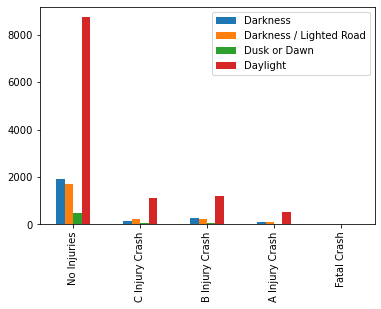

In [21]:
light_sverity_stat.plot.bar()

### Kendall's tau

In [22]:
# Step 4: Perform statistical test
scipy.stats.kendalltau(light_sverity_df['LightLevel'].values,light_sverity_df['Severity'].values)

KendalltauResult(correlation=0.00851695225886517, pvalue=0.22752446434640483)

Step 5: Interpret the test results
    
The p-value is larger than 0.5, indicating that the test result is not statistical significant

### Chi-square test & Cramer's V test

In [23]:
# Step 4: Perform statistical test
chi2, p, dof, expected = scipy.stats.chi2_contingency(light_sverity_stat)
print('Chi-square of the whole table:',chi2)
print('p-value: ',p)
print('Degree of freedom: ',dof)
print('Critical chi-square: ',scipy.stats.chi2.ppf(1-0.05, df=dof))
chi2_bycell = (light_sverity_stat-expected)**2/expected

Chi-square of the whole table: 89.95704574226889
p-value:  5.0328318658898884e-14
Degree of freedom:  12
Critical chi-square:  21.02606981748307


In [24]:
print('Observed frequency:')
light_sverity_stat

Observed frequency:


,Darkness,Darkness / Lighted Road,Dusk or Dawn,Daylight
No Injuries,1912,1689,489,8733
C Injury Crash,125,247,52,1135
B Injury Crash,287,224,81,1198
A Injury Crash,103,96,25,513
Fatal Crash,24,11,7,39


In [25]:
print('Expected value for each cell:')
pd.DataFrame(expected,
             index=['No Injuries','C Injury Crash','B Injury Crash','A Injury Crash','Fatal Crash'],
             columns= ['Darkness','Darkness / Lighted Road','Dusk or Dawn','Daylight'])

Expected value for each cell:


,Darkness,Darkness / Lighted Road,Dusk or Dawn,Daylight
No Injuries,1849.863037,1710.991230,493.598705,8768.547028
C Injury Crash,224.903414,208.019600,60.010948,1066.066039
B Injury Crash,258.227781,238.842260,68.902884,1224.027075
A Injury Crash,106.320600,98.338964,28.369511,503.970924
Fatal Crash,11.685168,10.807946,3.117952,55.388935


In [26]:
print('Chi-sauqre for each cell: ')
chi2_bycell.columns = ['Darkness','Darkness / Lighted Road','Dusk or Dawn','Daylight']
chi2_bycell.index= ['No Injuries','C Injury Crash','B Injury Crash','A Injury Crash','Fatal Crash']
chi2_bycell

Chi-sauqre for each cell: 


,Darkness,Darkness / Lighted Road,Dusk or Dawn,Daylight
No Injuries,2.087183,0.282651,0.042845,0.144105
C Injury Crash,44.377682,7.304464,1.069393,4.457408
B Injury Crash,3.205854,0.922335,2.123862,0.553426
A Injury Crash,0.103709,0.055632,0.400205,0.161764
Fatal Crash,12.978427,0.003413,4.833397,4.849293


In [27]:
# Step 4: Perform statistical test
n = np.sum(light_sverity_stat.values)
q = np.min(light_sverity_stat.values.shape)
cramerv = np.sqrt((chi2)/(n*(q-1)))
print("Cramer's V is: ",cramerv)

Cramer's V is:  0.042010734575179495


Step 5: Interpret the test results

- For Chi-square test:
    - The  p-value is <0.05, it means that the test is statistical significant.
    - The Chi-square value is relatively large (but not that large), which means that in some cells, observed value is different from the expected value. 
- For Cramer's V test:
    - There might be association between groups. But the association is not strong.

## Example 4: Continuous X * Discrete Y

Test if population density and crash counts are monotonically associated

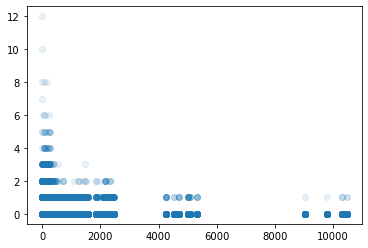

In [28]:
# Step 1: Examine the raw data
plt.scatter(df_urban_train['Pop_den'],df_urban_train_label,alpha=0.1)

Step 2: Select correct statistical test methods

According to [Transportation-Study-Focused-CorrelationTest](./Transportation-Study-Focused-CorrelationTest.ipynb) chapter, Spearman's rank-order correlation should be used. 


In [29]:
# Step 3: Adapt data for statistical test
df_test = pd.DataFrame()
df_test['Pop_den'] = df_urban_train['Pop_den'].values
df_test['CrashCounts'] = df_urban_train_label.values

In [30]:
# Step 4: Perform statistical test
rho, pval = scipy.stats.spearmanr(df_test['Pop_den'].values,df_test['CrashCounts'].values)
print('rho is: ', rho)
print('p-value is: ',pval)

rho is:  -0.017076371054715187
p-value is:  2.820677357482795e-51


Step 5: Interpret the test results

- From mathematical aspect
    - Basing on the commonly used significance level (0.5), the p-value given by this test indicates that the test result is statistically significant. The Null Hypothesis "There is no association between (the ranks of) the tested variables " should be rejected
    - There is a negative association between two variables. However, the small value indicates that the association is very weak.
- Relate with the study purpose
    - The population density are affected by many other features.


## Example 5: Continuous X * Continuous Y

Test if there is an association between Curve ratio and Crash rate(Number of crashes per vehicle miles traveled)

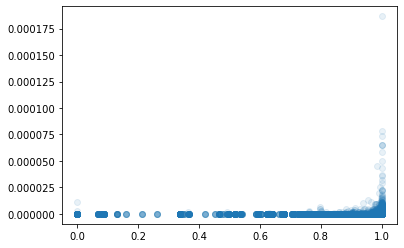

In [31]:
# Step 1: Examine the raw data
plt.scatter(df_rural_train['curve_ratio'],df_rural_train_label.values/(df_rural_train['AADT'].values*df_rural_train['st_length'].values),alpha=0.1)

Step 2: Select correct statistical test methods

According to [Transportation-Study-Focused-CorrelationTest](./Transportation-Study-Focused-CorrelationTest.ipynb) chapter, Spearman's rank-order correlation should be used. 


In [32]:
# Step 3: Adapt data for statistical test
X = df_rural_train['curve_ratio']
Y = df_rural_train_label.values/(df_rural_train['AADT'].values*df_rural_train['st_length'].values)

In [33]:
# Step 4: Perform statistical test
rho,pvalue = scipy.stats.spearmanr(X,Y)
print('rho: ',rho)
print('p-value: ',pvalue)

rho:  0.020434501583433785
p-value:  8.46349380654204e-20


Step 5: Interpret the test results

- From mathematical aspect
    - Basing on the commonly used significance level (0.5), the p-value given by this test indicates that the test result is statistically significant. The Null Hypothesis "There is no association between (the ranks of) the two variables " should be rejected
    - There is a positive association between two variables. However, the small value indicates that the association is weak.
- Relate with the study purpose
    - A high curve ratio may lead to a road having high crash rate. However, the curve_ratio itself can not show the full picture. There are many other factors that should be studied together to determine which factors (or groups of factors) are relatively more informative.